In [2]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications import xception
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.applications.xception import preprocess_input
from tensorflow.keras.models import Sequential
import tensorflow as tf
from tensorflow import keras
from keras import optimizers
import numpy as np
import os
#import cv2
from glob import glob
import matplotlib.pyplot as plt
import sklearn.metrics as metrics
from IPython.display import Image

In [1]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession
config = ConfigProto()
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [3]:
from itertools import cycle
#from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_auc_score

In [4]:
import sys
import tensorflow as tf
import pandas as pd
import sklearn as sk
import numpy as np
import matplotlib


print(f"Python {sys.version}")
print()
print(f"Tensorflow version: {tf.__version__}")
print(f"Keras Version: {tf.keras.__version__}")
print()
print(f"Pandas: {pd.__version__}")
print(f"Scikit-Learn: {sk.__version__}")
print(f"Numpy: {np.__version__}")
print(f"Matplotlib: {matplotlib.__version__}")
print()
print("GPU is ", "available" if tf.config.list_physical_devices('GPU') else "not available")
print(f"CUDA: {tf.test.is_built_with_cuda()}")

Python 3.9.12 (main, Apr  4 2022, 05:22:27) [MSC v.1916 64 bit (AMD64)]

Tensorflow version: 2.9.1
Keras Version: 2.9.0

Pandas: 1.4.2
Scikit-Learn: 1.0.2
Numpy: 1.21.5
Matplotlib: 3.5.1

GPU is  available
CUDA: True


In [5]:
!nvidia-smi

Tue Jul  5 04:17:32 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 516.40       Driver Version: 516.40       CUDA Version: 11.7     |
|-------------------------------+----------------------+----------------------+
| GPU  Name            TCC/WDDM | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ... WDDM  | 00000000:01:00.0 Off |                  N/A |
| N/A   49C    P8    12W /  N/A |    226MiB /  6144MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [6]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

optimizer = tf.keras.optimizers.Adam(learning_rate=0.00001)

In [7]:
train_path = 'D:/MScCS/thesis/Dataset/new/train'
valid_path = 'D:/MScCS/thesis/Dataset/new/test'

In [8]:
# Import the VGG16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

xception = xception.Xception(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [9]:
# don't train existing weights
for layer in xception.layers:
    layer.trainable = False

In [10]:
# useful for getting number of output classes
folders = glob('D:/MScCS/thesis/Dataset/new/train/*')

In [11]:
folders

['D:/MScCS/thesis/Dataset/new/train\\cocci',
 'D:/MScCS/thesis/Dataset/new/train\\healthy',
 'D:/MScCS/thesis/Dataset/new/train\\ncd',
 'D:/MScCS/thesis/Dataset/new/train\\salmo']

In [12]:
#layers
x = Flatten()(xception.output)

In [13]:
# x = Dense(1000, activation='relu')(x)
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=xception.input, outputs=prediction)

In [14]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 block1_conv1 (Conv2D)          (None, 111, 111, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 block1_conv1_bn (BatchNormaliz  (None, 111, 111, 32  128        ['block1_conv1[0][0]']           
 ation)                         )                                                             

 block4_sepconv1_bn (BatchNorma  (None, 28, 28, 728)  2912       ['block4_sepconv1[0][0]']        
 lization)                                                                                        
                                                                                                  
 block4_sepconv2_act (Activatio  (None, 28, 28, 728)  0          ['block4_sepconv1_bn[0][0]']     
 n)                                                                                               
                                                                                                  
 block4_sepconv2 (SeparableConv  (None, 28, 28, 728)  536536     ['block4_sepconv2_act[0][0]']    
 2D)                                                                                              
                                                                                                  
 block4_sepconv2_bn (BatchNorma  (None, 28, 28, 728)  2912       ['block4_sepconv2[0][0]']        
 lization)

 n)                                                                                               
                                                                                                  
 block7_sepconv1 (SeparableConv  (None, 14, 14, 728)  536536     ['block7_sepconv1_act[0][0]']    
 2D)                                                                                              
                                                                                                  
 block7_sepconv1_bn (BatchNorma  (None, 14, 14, 728)  2912       ['block7_sepconv1[0][0]']        
 lization)                                                                                        
                                                                                                  
 block7_sepconv2_act (Activatio  (None, 14, 14, 728)  0          ['block7_sepconv1_bn[0][0]']     
 n)                                                                                               
          

 block9_sepconv3_bn (BatchNorma  (None, 14, 14, 728)  2912       ['block9_sepconv3[0][0]']        
 lization)                                                                                        
                                                                                                  
 add_7 (Add)                    (None, 14, 14, 728)  0           ['block9_sepconv3_bn[0][0]',     
                                                                  'add_6[0][0]']                  
                                                                                                  
 block10_sepconv1_act (Activati  (None, 14, 14, 728)  0          ['add_7[0][0]']                  
 on)                                                                                              
                                                                                                  
 block10_sepconv1 (SeparableCon  (None, 14, 14, 728)  536536     ['block10_sepconv1_act[0][0]']   
 v2D)     

                                                                                                  
 block12_sepconv3_act (Activati  (None, 14, 14, 728)  0          ['block12_sepconv2_bn[0][0]']    
 on)                                                                                              
                                                                                                  
 block12_sepconv3 (SeparableCon  (None, 14, 14, 728)  536536     ['block12_sepconv3_act[0][0]']   
 v2D)                                                                                             
                                                                                                  
 block12_sepconv3_bn (BatchNorm  (None, 14, 14, 728)  2912       ['block12_sepconv3[0][0]']       
 alization)                                                                                       
                                                                                                  
 add_10 (A

In [16]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer=optimizer,
  metrics=['accuracy']
)

In [17]:
# Use the Image Data Generator to import the images from the dataset
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   rotation_range= 15,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [18]:
training_set = train_datagen.flow_from_directory('D:/MScCS/thesis/Dataset/new/train',
                                                 target_size = (224, 224),
                                                 batch_size = 8,
                                                 class_mode = 'categorical')

Found 800 images belonging to 4 classes.


In [19]:
test_set = test_datagen.flow_from_directory('D:/MScCS/thesis/Dataset/new/test',
                                            target_size = (224, 224),
                                            batch_size = 8,
                                            class_mode = 'categorical')


Found 200 images belonging to 4 classes.


In [20]:
itr = test_datagen.flow_from_directory(
'D:/MScCS/thesis/Dataset/new/test',
target_size=(224,224),
batch_size=8,
class_mode='categorical')

#X, y = itr.next()
x_test, y_test = itr.next()

n_classes = 4
lw = 2

Found 200 images belonging to 4 classes.


In [21]:
def plot_roc_curve():
    #roc curve plot

    y_score = model.predict(x_test)

    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])


    # First aggregate all false positive rates
    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

    # Then interpolate all ROC curves at this points
    mean_tpr = np.zeros_like(all_fpr)
    for i in range(n_classes):
        mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

    # Finally average it and compute AUC
    mean_tpr /= n_classes

    fpr["macro"] = all_fpr
    tpr["macro"] = mean_tpr
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

    # Plot all ROC curves
    plt.figure()
    plt.plot(
        fpr["micro"],
        tpr["micro"],
        label="micro-average ROC curve (area = {0:0.2f})".format(roc_auc["micro"]),
        color="deeppink",
        linestyle=":",
        linewidth=4,
    )

    plt.plot(
        fpr["macro"],
        tpr["macro"],
        label="macro-average ROC curve (area = {0:0.2f})".format(roc_auc["macro"]),
        color="navy",
        linestyle=":",
        linewidth=4,
    )

    colors = cycle(["aqua", "darkorange", "cornflowerblue", "green"])
    for i, color in zip(range(n_classes), colors):
        if(i == 0):
            plt.plot(
                fpr[i],
                tpr[i],
                color=color,
                lw=lw,
                label="ROC curve of cocci (area = {1:0.2f})".format(i, roc_auc[i]),
            )
        if(i == 1):
            plt.plot(
                fpr[i],
                tpr[i],
                color=color,
                lw=lw,
                label="ROC curve of healthy (area = {1:0.2f})".format(i, roc_auc[i]),
            )
        if(i == 2):
            plt.plot(
                fpr[i],
                tpr[i],
                color=color,
                lw=lw,
                label="ROC curve of ncd (area = {1:0.2f})".format(i, roc_auc[i]),
            )
        if(i == 3):
            plt.plot(
                fpr[i],
                tpr[i],
                color=color,
                lw=lw,
                label="ROC curve of salmo (area = {1:0.2f})".format(i, roc_auc[i]),
            )
    plt.plot([0, 1], [0, 1], "k--", lw=lw)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("Receiver operating characteristic to multiclass")
    plt.legend(loc="lower right")
    plt.show()


In [22]:
def plot_loss_acc():
    # plotting the loss
    plt.plot(r.history['loss'], label='train loss')
    plt.plot(r.history['val_loss'], label='val loss')
    plt.legend()
    plt.ylim(-0.05, 1.1)
    plt.show()

    # plotting the accuracy
    plt.plot(r.history['accuracy'], label='train accuracy')
    plt.plot(r.history['val_accuracy'], label='val accuracy')
    plt.legend()
    plt.ylim(-0.05, 1.1)
    plt.show()

In [23]:
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=10,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/10
100/100 [==============================] - 51s 406ms/step - loss: 0.9965 - accuracy: 0.5788 - val_loss: 0.6878 - val_accuracy: 0.7650
Epoch 2/10
100/100 [==============================] - 37s 367ms/step - loss: 0.5938 - accuracy: 0.8012 - val_loss: 0.5503 - val_accuracy: 0.8150
Epoch 3/10
100/100 [==============================] - 36s 360ms/step - loss: 0.4853 - accuracy: 0.8512 - val_loss: 0.4517 - val_accuracy: 0.8700
Epoch 4/10
100/100 [==============================] - 37s 366ms/step - loss: 0.3979 - accuracy: 0.8725 - val_loss: 0.4227 - val_accuracy: 0.8650
Epoch 5/10
100/100 [==============================] - 36s 363ms/step - loss: 0.3512 - accuracy: 0.8925 - val_loss: 0.3812 - val_accuracy: 0.8700
Epoch 6/10
100/100 [==============================] - 37s 367ms/step - loss: 0.3174 - accuracy: 0.9025 - val_loss: 0.3707 - val_accuracy: 0.8650
Epoch 7/10
100/100 [==============================] - 37s 371ms/step - loss: 0.2761 - accuracy: 0.9212 - val_loss: 0.3563 - val_ac

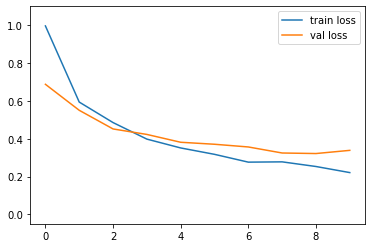

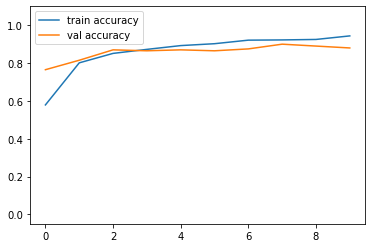

1/1 [==============================] - 1s 636ms/step


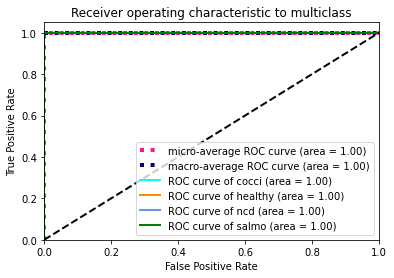

In [24]:
plot_loss_acc()
plot_roc_curve()
model.save('./models/xceptionnet_10.h5')

In [25]:
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=15,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/15
100/100 [==============================] - 37s 368ms/step - loss: 0.2287 - accuracy: 0.9325 - val_loss: 0.2925 - val_accuracy: 0.9050
Epoch 2/15
100/100 [==============================] - 36s 361ms/step - loss: 0.2083 - accuracy: 0.9388 - val_loss: 0.3228 - val_accuracy: 0.8950
Epoch 3/15
100/100 [==============================] - 36s 356ms/step - loss: 0.2199 - accuracy: 0.9337 - val_loss: 0.3203 - val_accuracy: 0.8900
Epoch 4/15
100/100 [==============================] - 36s 363ms/step - loss: 0.2048 - accuracy: 0.9350 - val_loss: 0.3039 - val_accuracy: 0.8900
Epoch 5/15
100/100 [==============================] - 36s 362ms/step - loss: 0.1902 - accuracy: 0.9337 - val_loss: 0.2801 - val_accuracy: 0.9000
Epoch 6/15
100/100 [==============================] - 36s 358ms/step - loss: 0.1822 - accuracy: 0.9488 - val_loss: 0.2810 - val_accuracy: 0.9000
Epoch 7/15
100/100 [==============================] - 36s 364ms/step - loss: 0.1713 - accuracy: 0.9513 - val_loss: 0.2796 - val_ac

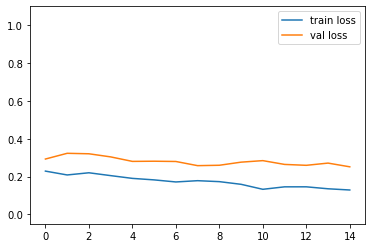

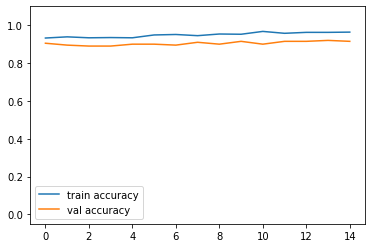

1/1 [==============================] - 0s 29ms/step


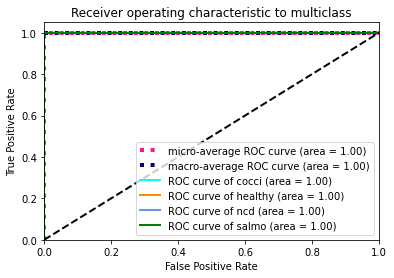

In [26]:
plot_loss_acc()
plot_roc_curve()
model.save('./models/xceptionnet_15.h5')

In [27]:
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=20,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/20
100/100 [==============================] - 35s 347ms/step - loss: 0.1209 - accuracy: 0.9638 - val_loss: 0.2513 - val_accuracy: 0.9100
Epoch 2/20
100/100 [==============================] - 41s 415ms/step - loss: 0.1204 - accuracy: 0.9675 - val_loss: 0.2659 - val_accuracy: 0.9150
Epoch 3/20
100/100 [==============================] - 88s 881ms/step - loss: 0.1250 - accuracy: 0.9663 - val_loss: 0.2660 - val_accuracy: 0.9100
Epoch 4/20
100/100 [==============================] - 37s 369ms/step - loss: 0.1183 - accuracy: 0.9700 - val_loss: 0.2548 - val_accuracy: 0.9150
Epoch 5/20
100/100 [==============================] - 34s 340ms/step - loss: 0.1166 - accuracy: 0.9700 - val_loss: 0.2539 - val_accuracy: 0.9150
Epoch 6/20
100/100 [==============================] - 34s 336ms/step - loss: 0.1062 - accuracy: 0.9675 - val_loss: 0.2472 - val_accuracy: 0.9100
Epoch 7/20
100/100 [==============================] - 33s 334ms/step - loss: 0.1123 - accuracy: 0.9663 - val_loss: 0.2333 - val_ac

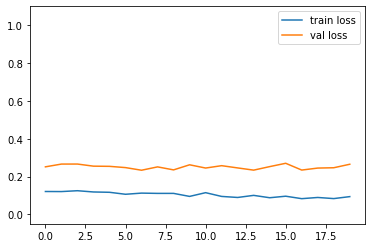

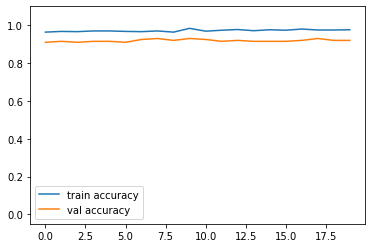

1/1 [==============================] - 0s 33ms/step


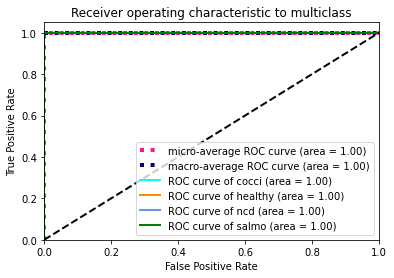

In [28]:
plot_loss_acc()
plot_roc_curve()
model.save('./models/xceptionnet82_20.h5')

In [35]:
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=25,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/25
100/100 [==============================] - 34s 342ms/step - loss: 0.0781 - accuracy: 0.9850 - val_loss: 0.2414 - val_accuracy: 0.9100
Epoch 2/25
100/100 [==============================] - 34s 339ms/step - loss: 0.0789 - accuracy: 0.9812 - val_loss: 0.2582 - val_accuracy: 0.9200
Epoch 3/25
100/100 [==============================] - 34s 340ms/step - loss: 0.0727 - accuracy: 0.9850 - val_loss: 0.2505 - val_accuracy: 0.9100
Epoch 4/25
100/100 [==============================] - 33s 333ms/step - loss: 0.0791 - accuracy: 0.9812 - val_loss: 0.2547 - val_accuracy: 0.9100
Epoch 5/25
100/100 [==============================] - 33s 332ms/step - loss: 0.0700 - accuracy: 0.9850 - val_loss: 0.2444 - val_accuracy: 0.9300
Epoch 6/25
100/100 [==============================] - 33s 334ms/step - loss: 0.0639 - accuracy: 0.9875 - val_loss: 0.2607 - val_accuracy: 0.9300
Epoch 7/25
100/100 [==============================] - 34s 335ms/step - loss: 0.0719 - accuracy: 0.9837 - val_loss: 0.2491 - val_ac

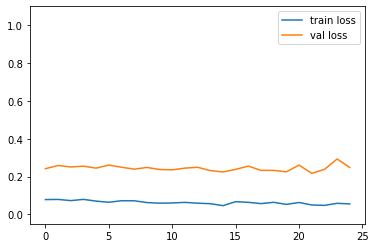

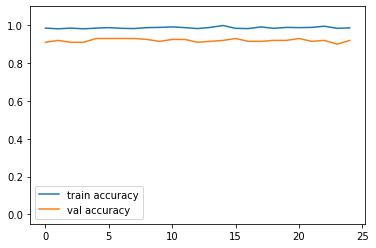

1/1 [==============================] - 0s 26ms/step


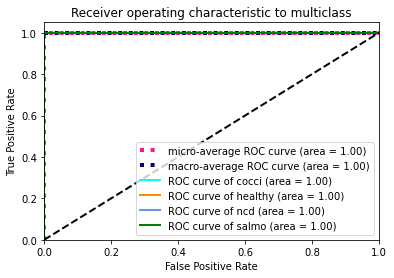

In [36]:
plot_loss_acc()
plot_roc_curve()
model.save('./models/xceptionnet82_25.h5')

In [41]:
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=30,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/30
100/100 [==============================] - 34s 335ms/step - loss: 0.0436 - accuracy: 0.9937 - val_loss: 0.2651 - val_accuracy: 0.9100
Epoch 2/30
100/100 [==============================] - 33s 334ms/step - loss: 0.0508 - accuracy: 0.9875 - val_loss: 0.2388 - val_accuracy: 0.9150
Epoch 3/30
100/100 [==============================] - 33s 335ms/step - loss: 0.0465 - accuracy: 0.9912 - val_loss: 0.2638 - val_accuracy: 0.9050
Epoch 4/30
100/100 [==============================] - 33s 334ms/step - loss: 0.0496 - accuracy: 0.9912 - val_loss: 0.2239 - val_accuracy: 0.9150
Epoch 5/30
100/100 [==============================] - 33s 334ms/step - loss: 0.0472 - accuracy: 0.9900 - val_loss: 0.2231 - val_accuracy: 0.9100
Epoch 6/30
100/100 [==============================] - 34s 335ms/step - loss: 0.0454 - accuracy: 0.9950 - val_loss: 0.2394 - val_accuracy: 0.9100
Epoch 7/30
100/100 [==============================] - 34s 336ms/step - loss: 0.0455 - accuracy: 0.9900 - val_loss: 0.2234 - val_ac

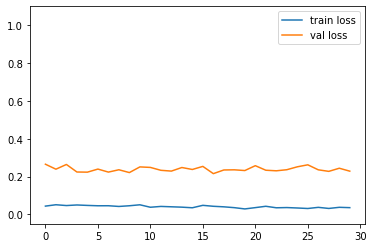

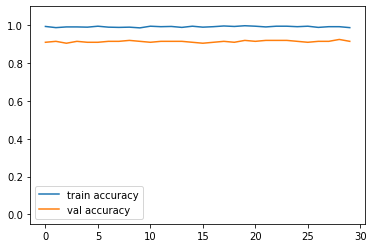

1/1 [==============================] - 0s 28ms/step


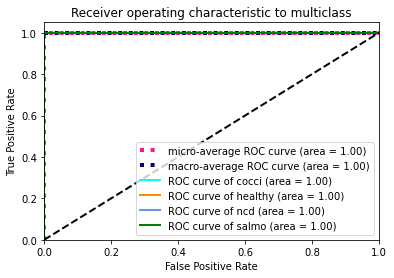

In [42]:
plot_loss_acc()
plot_roc_curve()
model.save('./models/xceptionnet82_30.h5')

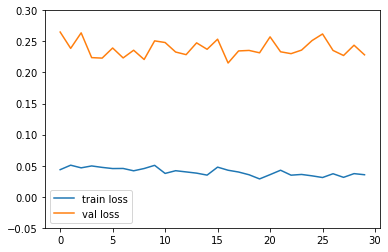

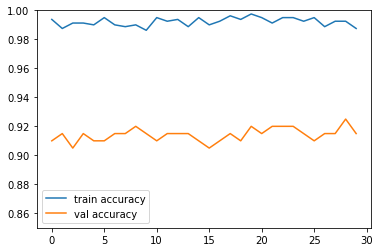

In [47]:
 # plotting the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.ylim(-0.05, 0.3)
plt.show()

    # plotting the accuracy
plt.plot(r.history['accuracy'], label='train accuracy')
plt.plot(r.history['val_accuracy'], label='val accuracy')
plt.legend()
plt.ylim(0.85, 1.00)
plt.show()

In [48]:
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=35,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/35
100/100 [==============================] - 35s 345ms/step - loss: 0.0300 - accuracy: 0.9950 - val_loss: 0.2276 - val_accuracy: 0.9150
Epoch 2/35
100/100 [==============================] - 34s 335ms/step - loss: 0.0308 - accuracy: 0.9950 - val_loss: 0.2467 - val_accuracy: 0.9100
Epoch 3/35
100/100 [==============================] - 34s 336ms/step - loss: 0.0346 - accuracy: 0.9925 - val_loss: 0.2299 - val_accuracy: 0.9150
Epoch 4/35
100/100 [==============================] - 33s 334ms/step - loss: 0.0268 - accuracy: 0.9975 - val_loss: 0.2087 - val_accuracy: 0.9350
Epoch 5/35
100/100 [==============================] - 33s 333ms/step - loss: 0.0266 - accuracy: 0.9975 - val_loss: 0.2497 - val_accuracy: 0.9250
Epoch 6/35
100/100 [==============================] - 34s 335ms/step - loss: 0.0313 - accuracy: 0.9962 - val_loss: 0.2550 - val_accuracy: 0.9100
Epoch 7/35
100/100 [==============================] - 34s 334ms/step - loss: 0.0285 - accuracy: 0.9950 - val_loss: 0.2111 - val_ac

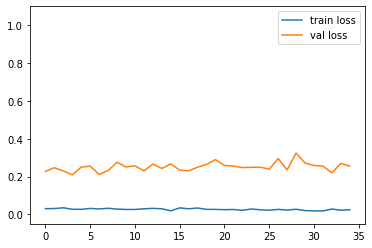

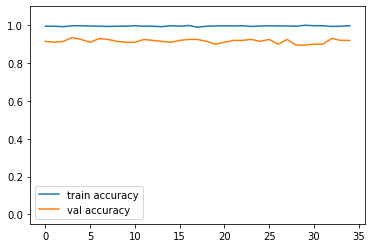

1/1 [==============================] - 0s 26ms/step


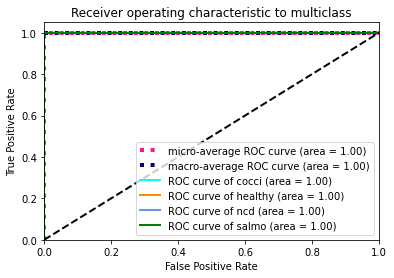

In [49]:
plot_loss_acc()
plot_roc_curve()
model.save('./models/xceptionnet82_35.h5')

In [50]:
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=40,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/40
100/100 [==============================] - 34s 339ms/step - loss: 0.0205 - accuracy: 0.9975 - val_loss: 0.2558 - val_accuracy: 0.9150
Epoch 2/40
100/100 [==============================] - 33s 335ms/step - loss: 0.0195 - accuracy: 0.9987 - val_loss: 0.2456 - val_accuracy: 0.9300
Epoch 3/40
100/100 [==============================] - 34s 336ms/step - loss: 0.0220 - accuracy: 0.9962 - val_loss: 0.2555 - val_accuracy: 0.9200
Epoch 4/40
100/100 [==============================] - 34s 337ms/step - loss: 0.0239 - accuracy: 0.9950 - val_loss: 0.2731 - val_accuracy: 0.9100
Epoch 5/40
100/100 [==============================] - 34s 335ms/step - loss: 0.0240 - accuracy: 0.9962 - val_loss: 0.2704 - val_accuracy: 0.9100
Epoch 6/40
100/100 [==============================] - 33s 335ms/step - loss: 0.0235 - accuracy: 0.9937 - val_loss: 0.2672 - val_accuracy: 0.9200
Epoch 7/40
100/100 [==============================] - 33s 335ms/step - loss: 0.0264 - accuracy: 0.9950 - val_loss: 0.2822 - val_ac

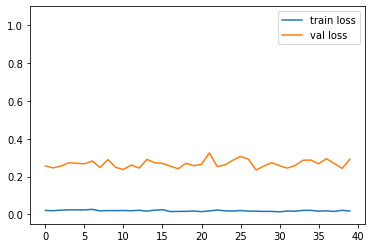

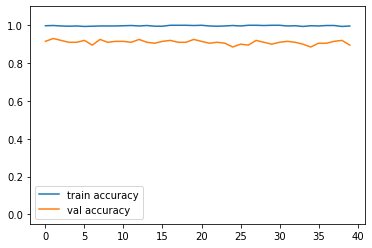

1/1 [==============================] - 0s 28ms/step


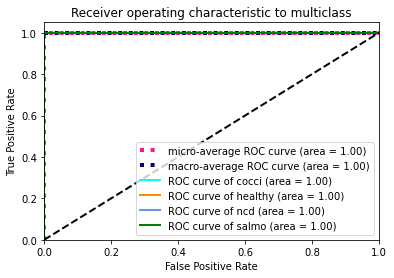

In [51]:
plot_loss_acc()
plot_roc_curve()
model.save('./models/xceptionnet82_40.h5')

In [52]:
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=45,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/45
100/100 [==============================] - 34s 336ms/step - loss: 0.0183 - accuracy: 0.9937 - val_loss: 0.2489 - val_accuracy: 0.9100
Epoch 2/45
100/100 [==============================] - 34s 338ms/step - loss: 0.0141 - accuracy: 0.9975 - val_loss: 0.2883 - val_accuracy: 0.9050
Epoch 3/45
100/100 [==============================] - 33s 335ms/step - loss: 0.0188 - accuracy: 0.9975 - val_loss: 0.2432 - val_accuracy: 0.9250
Epoch 4/45
100/100 [==============================] - 34s 337ms/step - loss: 0.0163 - accuracy: 0.9975 - val_loss: 0.2551 - val_accuracy: 0.9100
Epoch 5/45
100/100 [==============================] - 34s 335ms/step - loss: 0.0132 - accuracy: 1.0000 - val_loss: 0.2482 - val_accuracy: 0.9100
Epoch 6/45
100/100 [==============================] - 34s 338ms/step - loss: 0.0149 - accuracy: 0.9975 - val_loss: 0.2506 - val_accuracy: 0.9200
Epoch 7/45
100/100 [==============================] - 34s 336ms/step - loss: 0.0120 - accuracy: 0.9987 - val_loss: 0.2334 - val_ac

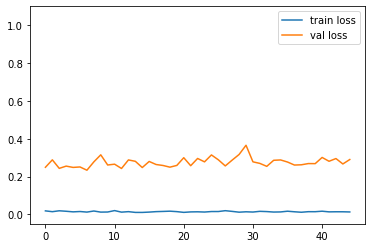

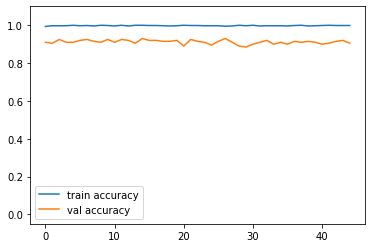

1/1 [==============================] - 0s 26ms/step


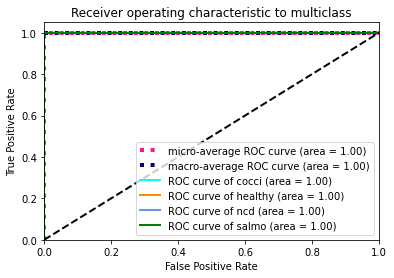

In [53]:
plot_loss_acc()
plot_roc_curve()
model.save('./models/xceptionnet82_45.h5')

In [54]:
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=50,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/50
100/100 [==============================] - 34s 337ms/step - loss: 0.0155 - accuracy: 0.9962 - val_loss: 0.2466 - val_accuracy: 0.9300
Epoch 2/50
100/100 [==============================] - 34s 337ms/step - loss: 0.0148 - accuracy: 0.9975 - val_loss: 0.2652 - val_accuracy: 0.9200
Epoch 3/50
100/100 [==============================] - 34s 336ms/step - loss: 0.0163 - accuracy: 0.9950 - val_loss: 0.2432 - val_accuracy: 0.9200
Epoch 4/50
100/100 [==============================] - 34s 338ms/step - loss: 0.0139 - accuracy: 0.9987 - val_loss: 0.2423 - val_accuracy: 0.9100
Epoch 5/50
100/100 [==============================] - 34s 336ms/step - loss: 0.0110 - accuracy: 1.0000 - val_loss: 0.2653 - val_accuracy: 0.9100
Epoch 6/50
100/100 [==============================] - 34s 336ms/step - loss: 0.0141 - accuracy: 0.9975 - val_loss: 0.2407 - val_accuracy: 0.9250
Epoch 7/50
100/100 [==============================] - 34s 338ms/step - loss: 0.0101 - accuracy: 0.9987 - val_loss: 0.2685 - val_ac

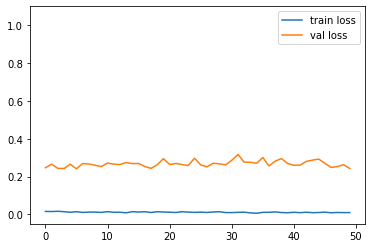

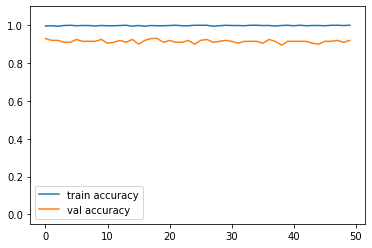

1/1 [==============================] - 0s 27ms/step


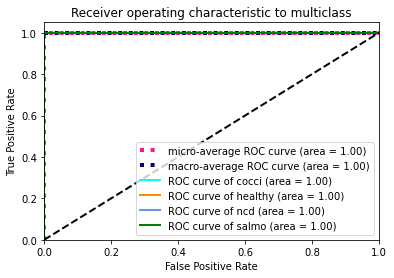

In [55]:
plot_loss_acc()
plot_roc_curve()
model.save('./models/xceptionnet82_50.h5')

In [56]:
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=60,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/60
100/100 [==============================] - 34s 339ms/step - loss: 0.0103 - accuracy: 0.9987 - val_loss: 0.2605 - val_accuracy: 0.9000
Epoch 2/60
100/100 [==============================] - 34s 336ms/step - loss: 0.0084 - accuracy: 0.9987 - val_loss: 0.2651 - val_accuracy: 0.9200
Epoch 3/60
100/100 [==============================] - 34s 335ms/step - loss: 0.0069 - accuracy: 1.0000 - val_loss: 0.2967 - val_accuracy: 0.9150
Epoch 4/60
100/100 [==============================] - 34s 338ms/step - loss: 0.0084 - accuracy: 1.0000 - val_loss: 0.2603 - val_accuracy: 0.9200
Epoch 5/60
100/100 [==============================] - 33s 334ms/step - loss: 0.0123 - accuracy: 0.9987 - val_loss: 0.2502 - val_accuracy: 0.9200
Epoch 6/60
100/100 [==============================] - 33s 334ms/step - loss: 0.0076 - accuracy: 1.0000 - val_loss: 0.2506 - val_accuracy: 0.9300
Epoch 7/60
100/100 [==============================] - 33s 333ms/step - loss: 0.0071 - accuracy: 0.9987 - val_loss: 0.2601 - val_ac

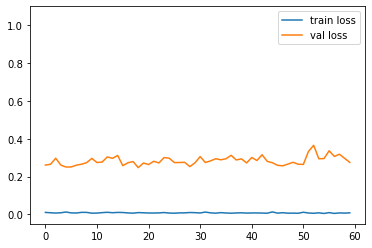

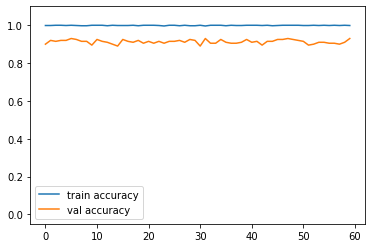

1/1 [==============================] - 0s 27ms/step


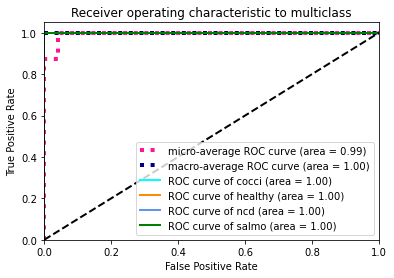

In [57]:
plot_loss_acc()
plot_roc_curve()
model.save('./models/xceptionnet_60.h5')

In [62]:
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=70,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/70
100/100 [==============================] - 34s 340ms/step - loss: 0.0052 - accuracy: 1.0000 - val_loss: 0.2674 - val_accuracy: 0.9150
Epoch 2/70
100/100 [==============================] - 34s 335ms/step - loss: 0.0061 - accuracy: 1.0000 - val_loss: 0.3029 - val_accuracy: 0.9050
Epoch 3/70
100/100 [==============================] - 34s 336ms/step - loss: 0.0068 - accuracy: 1.0000 - val_loss: 0.2852 - val_accuracy: 0.9100
Epoch 4/70
100/100 [==============================] - 33s 334ms/step - loss: 0.0046 - accuracy: 1.0000 - val_loss: 0.2786 - val_accuracy: 0.9100
Epoch 5/70
100/100 [==============================] - 34s 336ms/step - loss: 0.0050 - accuracy: 1.0000 - val_loss: 0.2769 - val_accuracy: 0.9100
Epoch 6/70
100/100 [==============================] - 34s 335ms/step - loss: 0.0040 - accuracy: 1.0000 - val_loss: 0.2733 - val_accuracy: 0.9150
Epoch 7/70
100/100 [==============================] - 34s 337ms/step - loss: 0.0048 - accuracy: 1.0000 - val_loss: 0.3250 - val_ac

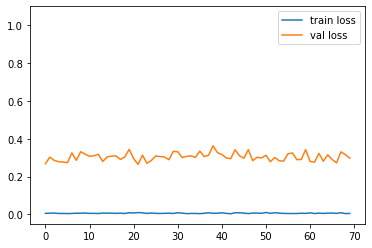

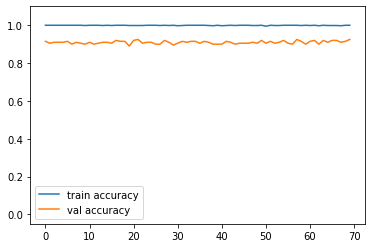

1/1 [==============================] - 0s 29ms/step


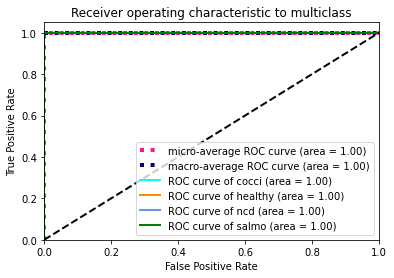

In [63]:
plot_loss_acc()
plot_roc_curve()
model.save('./models/xceptionnet_70.h5')

In [64]:
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=80,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/80
100/100 [==============================] - 34s 342ms/step - loss: 0.0108 - accuracy: 0.9975 - val_loss: 0.2710 - val_accuracy: 0.9250
Epoch 2/80
100/100 [==============================] - 34s 335ms/step - loss: 0.0049 - accuracy: 1.0000 - val_loss: 0.3124 - val_accuracy: 0.9050
Epoch 3/80
100/100 [==============================] - 33s 335ms/step - loss: 0.0056 - accuracy: 1.0000 - val_loss: 0.2906 - val_accuracy: 0.9200
Epoch 4/80
100/100 [==============================] - 34s 336ms/step - loss: 0.0042 - accuracy: 1.0000 - val_loss: 0.3108 - val_accuracy: 0.9150
Epoch 5/80
100/100 [==============================] - 34s 335ms/step - loss: 0.0055 - accuracy: 1.0000 - val_loss: 0.2791 - val_accuracy: 0.9200
Epoch 6/80
100/100 [==============================] - 34s 337ms/step - loss: 0.0054 - accuracy: 1.0000 - val_loss: 0.2846 - val_accuracy: 0.9250
Epoch 7/80
100/100 [==============================] - 33s 335ms/step - loss: 0.0047 - accuracy: 0.9987 - val_loss: 0.3035 - val_ac

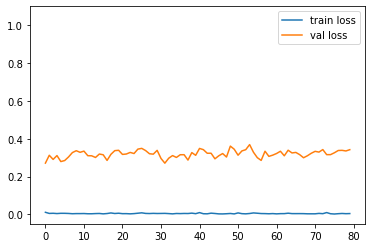

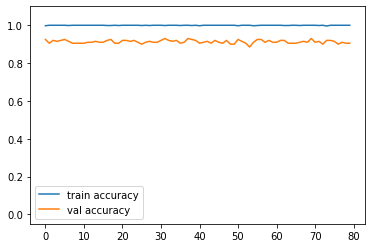

1/1 [==============================] - 0s 27ms/step


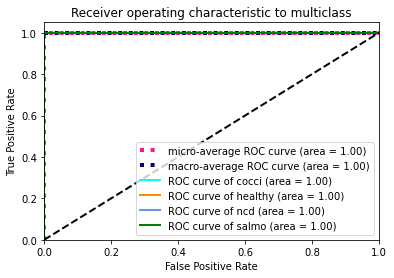

In [65]:
plot_loss_acc()
plot_roc_curve()
model.save('./models/xceptionnet_80.h5')

In [66]:
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=90,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/90
100/100 [==============================] - 34s 337ms/step - loss: 0.0052 - accuracy: 0.9987 - val_loss: 0.2947 - val_accuracy: 0.9250
Epoch 2/90
100/100 [==============================] - 34s 334ms/step - loss: 0.0036 - accuracy: 1.0000 - val_loss: 0.2960 - val_accuracy: 0.9300
Epoch 3/90
100/100 [==============================] - 34s 334ms/step - loss: 0.0026 - accuracy: 1.0000 - val_loss: 0.2921 - val_accuracy: 0.9350
Epoch 4/90
100/100 [==============================] - 34s 336ms/step - loss: 0.0035 - accuracy: 1.0000 - val_loss: 0.3284 - val_accuracy: 0.9100
Epoch 5/90
100/100 [==============================] - 34s 335ms/step - loss: 0.0069 - accuracy: 0.9975 - val_loss: 0.3348 - val_accuracy: 0.9100
Epoch 6/90
100/100 [==============================] - 34s 336ms/step - loss: 0.0063 - accuracy: 0.9987 - val_loss: 0.3056 - val_accuracy: 0.9200
Epoch 7/90
100/100 [==============================] - 34s 337ms/step - loss: 0.0028 - accuracy: 1.0000 - val_loss: 0.3263 - val_ac

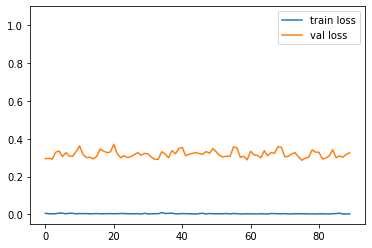

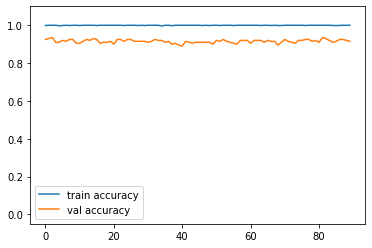

1/1 [==============================] - 0s 26ms/step


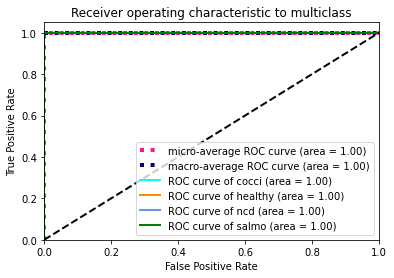

In [67]:
plot_loss_acc()
plot_roc_curve()
model.save('./models/xceptionnet_90.h5')

In [68]:
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=100,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/100
100/100 [==============================] - 35s 347ms/step - loss: 0.0021 - accuracy: 1.0000 - val_loss: 0.3231 - val_accuracy: 0.9200
Epoch 2/100
100/100 [==============================] - 34s 336ms/step - loss: 0.0029 - accuracy: 1.0000 - val_loss: 0.3312 - val_accuracy: 0.9250
Epoch 3/100
100/100 [==============================] - 33s 332ms/step - loss: 0.0016 - accuracy: 1.0000 - val_loss: 0.3558 - val_accuracy: 0.9100
Epoch 4/100
100/100 [==============================] - 34s 335ms/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 0.3425 - val_accuracy: 0.9100
Epoch 5/100
100/100 [==============================] - 34s 336ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.3267 - val_accuracy: 0.9200
Epoch 6/100
100/100 [==============================] - 34s 336ms/step - loss: 0.0025 - accuracy: 1.0000 - val_loss: 0.3501 - val_accuracy: 0.9100
Epoch 7/100
100/100 [==============================] - 33s 335ms/step - loss: 0.0026 - accuracy: 1.0000 - val_loss: 0.3206 -

Epoch 57/100
100/100 [==============================] - 34s 335ms/step - loss: 0.0025 - accuracy: 1.0000 - val_loss: 0.3439 - val_accuracy: 0.9050
Epoch 58/100
100/100 [==============================] - 34s 336ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.3628 - val_accuracy: 0.9050
Epoch 59/100
100/100 [==============================] - 33s 334ms/step - loss: 0.0026 - accuracy: 1.0000 - val_loss: 0.3333 - val_accuracy: 0.9200
Epoch 60/100
100/100 [==============================] - 34s 335ms/step - loss: 0.0032 - accuracy: 1.0000 - val_loss: 0.3334 - val_accuracy: 0.9200
Epoch 61/100
100/100 [==============================] - 33s 336ms/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 0.3374 - val_accuracy: 0.9200
Epoch 62/100
100/100 [==============================] - 34s 335ms/step - loss: 0.0019 - accuracy: 1.0000 - val_loss: 0.3551 - val_accuracy: 0.9150
Epoch 63/100
100/100 [==============================] - 33s 335ms/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 0

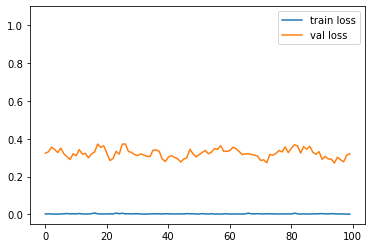

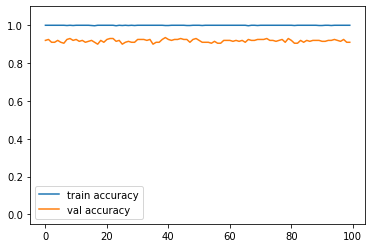

1/1 [==============================] - 0s 27ms/step


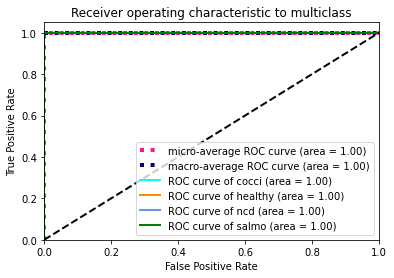

In [69]:
plot_loss_acc()
plot_roc_curve()
model.save('./models/xceptionnet_100.h5')

In [73]:
path = 'D:/MScCS/thesis/Dataset/new/separate testing/cocci/'
count = 0
for i in os.listdir(path):
    filename = path + i
    #print(filename)
    #displaying images
    Image(filename,width=224,height=224)
    img = image.load_img(filename,target_size=(224,224))
    #plt.imshow(img)

    #initializing the model to predict the image details using predefined models.
    #model = tf.keras.applications.mobilenet_v2.MobileNetV2()
    resizedimg = image.img_to_array(img)
    finalimg = np.expand_dims(resizedimg,axis=0)
    finalimg = tf.keras.applications.xception.preprocess_input(finalimg)
    finalimg.shape
    predictions = model.predict(finalimg)
    category = np.argmax(predictions)
    # To predict and decode the image details
    #results = imagenet_utils.decode_predictions(predictions)
    #print(category)
    if(category == 0):
        count = count + 1
print('Total accurate prediction for cocci:', count)

1/1 [==============================] - 0s 22ms/step
Total accurate prediction for cocci: 25


In [ ]:
#epoch 10,15,40 -> 71
#epoch 20,25 -> 72
#epoch 30,60,45,60 -> 73
#epoch 35,50,80,90,100 -> 74
#epoch 70 -> 75